# Project 3: Representation Learning

## Objectives
Your goal in this project is to get comfortable in implementing k-means, PCA, and neural network. To complete this project, you should understand the following:

* How to use basic math and machine learning modules in python such as numpy
* How to fit a k-means algorithm *from scratch*
* How to perform PCA (principal component analysis) *from scratch* on MNIST dataset
* How to train a neural network *from scratch* on MNIST dataset
* How to evaluate the test results and visualize the outcome of an ML models

## Deliverable
* Project report/writeup: A `project3_report_lastname.pdf` file with corresponding plots and results for the project. Follow the `Project 3 - Report (Individual Submission)` link on Gradescope to upload this file. Also, please put your name on the report so that the grader can find your code easier on the Gradescope. 

    The project report should include a brief justification of your solution at a high-level, e.g., using any relevant explanations, equations, or pictures that help to explain your solution. You should also describe what your code does, e.g. using a couple of sentences per function to describe your code structure. The objective is to make the report self-contained for grading.

    * To be more specific, in addition to textual descriptions and explanations for each sections, you should include images/screenshots/code blocks of:
        1. Any code snippets you implemented
        2. Plots affected by your implementation, e.g., scatter plots with decision boundaries or loss curves.
        3. Output results of the questions, e.g., the best lambda from cross validation.
        4. Please do NOT include debugging messages.


* Source code: A `project3_src_lastname1[_lastname2].ipynb` (or `.zip`) file with a working copy of your solutions compiled in a Jupyter notebook. Follow the `Project 3 - Source Code (Group Submission)` link to upload this file.
    * You are asked to complete code snippets in the following two formats:
        1. Between comments of `Your code starts here` and `End of Your Code`.
        2. Inline comments with `Your code here`.


## Logistics

* You can work in groups of 1-2 students for each course project, and it's your responsibility to find a group (e.g. use Ed Discussion). 
* Every member of a group must complete and submit the project report/writeup individually. While the source code can be the same for all group members, the project report needs to be written independently by each person and, thus, should differ among team member and students more generally.
* One one group member need to submit the source code. If you submit as a group, make sure to include your teammate in the group submission. Instructions for team submission can be found [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
* Grades will be provided based on the individual project report. The source code submission will not be graded, but the teaching staff may check the source files if they see the need for reproducing your results when going through your project report. 
* Failure to submit the source code will lead to a deduction of points from your total.


## Task 3A: K-Means (30pt)
K-Means is an unsupervised ML algorithm that segments data into groups based on their similarities. In this part, we will implement k-means from scratch (using only numpy).

### Data Loader
We will use 2-dimensional data in this section. Specifically, the dataset are
2D points $[(x_1, x_2), (x_2, y_2), \dots, (x_n, y_n)]$ that form 5 distinct clusters.

In [3]:
# install seaborn for better visualization
# !pip install seaborn



<class 'numpy.ndarray'>


Prepare and plot the training set.

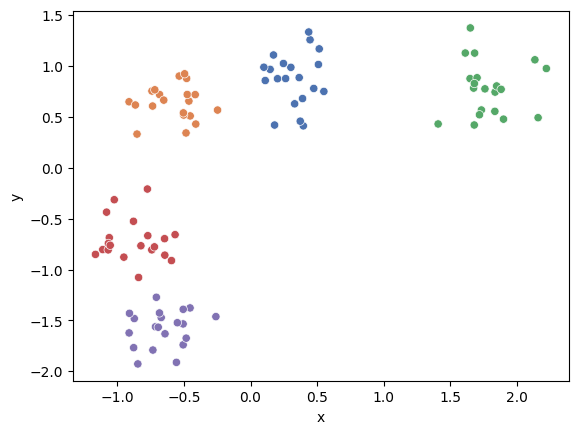

In [2]:
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

num_samples = 100
num_centers = 5

X_train, true_labels = make_blobs(
    n_samples=num_samples,
    centers=num_centers,
    random_state=80,
)
X_train = StandardScaler().fit_transform(X_train)
sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    hue=true_labels,
    palette="deep",
    legend=None,
)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

### K-Means Implementation
Now we are implementing the algorithm.

First, we define "similarity" between points. For our dataset, we will be using Euclidean distances.

**Implement a helper function** that has two inputs: dataset, cur_point, and returns the Euclidean distance between cur_point and each point in the dataset.

In [36]:
import numpy as np


def euclidean_dist(cur_point, dataset):
    '''
    cur_point has dimensions (m,), dataset has dimensions (n, m), and output will be of size (n,).
    '''
    dists = None
    
    # Your Code Starts Here
    dists = np.linalg.norm(dataset-cur_point,axis=1)
    # End of Your Code

    return dists

Now, we implement the actual K-Means. We initialize K-Means with two parameters: number of clusters, and max number of iteractions, which you will use in the init function. Then, **implement the fit function** which takes the dataset you created earlier as input. Finally, **implement a predict function** that assigns each data point to the centroids.

In [139]:
import random
from numpy.random import uniform


class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit(self, X_train):
        """
        # Step 1:
        Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        then the rest are initialized w/ probabilities proportional to their distances to the first
        Pick a random point from train data for first centroid
        """
        self.centroids = []
        # Your Code Starts Here
        n, _ =  X_train.shape
        ran_index = int(uniform(low=0, high=n-1))
        ran_point = X_train[ran_index]
        self.centroids.append(ran_point)
        for _ in range(1,self.n_clusters):
            distances = np.minimum.reduce([euclidean_dist(c,X_train) for c in self.centroids])
            total = np.sum(distances)
            normalized_distance = distances/total
            new_center = X_train[np.random.choice(len(normalized_distance),p=normalized_distance)]
            self.centroids.append(new_center)


        """
        Step 2:
        Iterate, adjusting centroids until converged (new centroids are the same as previous centroids)
        or until passed max_iter
        """
        iteration = 0
        prev_centroids = np.zeros((5,2))


        # Your Code Starts Here
        while iteration <= self.max_iter and not (prev_centroids == self.centroids).all():
            prev_centroids = np.copy(self.centroids)
            distances = np.array([euclidean_dist(X_train, centroid) for centroid in self.centroids])
            centroid_idxs = np.argmin(distances, axis=0)
            for i in range(self.n_clusters):
                self.centroids[i] = np.mean(X_train[centroid_idxs == i], axis=0)

            iteration +=1 
        # End of Your Code

    def predict(self,X):
        """
        Assign each data point to the nearest centroid.

        return:
            centroids: a list of the final centroids.
            centroid_idxs: a list of the indices of the centroids that each data point is assigned to.
        """
        centroids = self.centroids
        distances = np.array([euclidean_dist(X, centroid) for centroid in self.centroids])
        centroid_idxs = np.argmin(distances, axis=0)
        
        # Your Code Starts Here
        
        # End of Your Code

        return centroids, centroid_idxs

Finally, **test and visualize your k-means algorithm**. In the below given code, we separate the different true labels by color (as previously), and we distinguish predicted labels by marker styles.

*You should make sure all centroids ("+" signs) are in different clusters. Hint: initialization is important for k-means.*

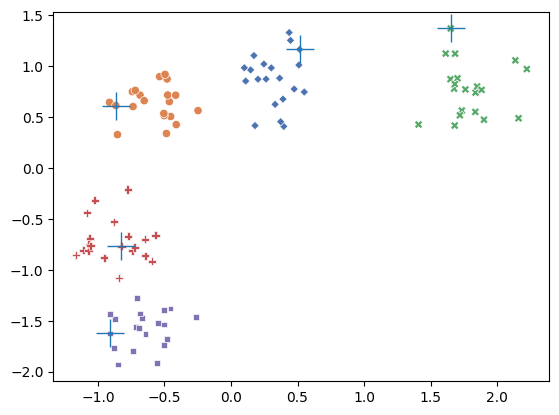

In [156]:
# Run k-means
model = KMeans(n_clusters=num_centers)
model.fit(X_train)

# View results
class_centers, classification = model.predict(X_train)

# plot the ground truths
sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    hue=true_labels,
    style=classification,
    palette="deep",
    legend=None
)
# plot the centroids
plt.plot(
    [x for x, _ in class_centers],
    [y for _, y in class_centers],
    '+',
    markersize=20,
)
plt.show()

## Task 3B: Principal Component Analysis (30pt)

In this problem you will apply PCA for dimensionality reduction to the MNIST dataset.

Note that **you must implement PCA directly with Numpy**, you are not allowed to use the PCA class from scikit-learn or any other PCA/dimensionality reduction library.

### Load the dataset and visualize some examples

In [157]:
# Download dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

print('Loading and preprocessing data')
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, data_home='data')
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

Loading and preprocessing data


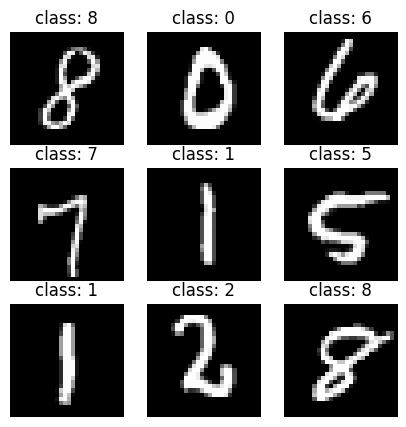

In [158]:
# plot some random samples from training set
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'class: {y_train[i]}')
    ax.axis('off')

### A simple linear classifier

This class has been implemented for you. You don't need to change code here.

In [159]:
# Don't Change this cell
class LinearClassifier:
    """
    Simple linear classifier trained using full-batch gradient descent.
    - Maps n_features -> n_classes logits using a weight matrix W and bias vector b.
    - Applies softmax to the logits to get class probabilities that sum to 1.
    - In prediction, we take the class with the highest probability as our output class.
    """
    def __init__(self, n_features, classes=np.arange(10), eps=1e-4):
        self.classes = classes
        self.W = np.random.rand(n_features, len(classes)) / 30
        self.b = np.random.rand(len(classes)) / 30
        self.eps = eps
    
    def fit(self, X, y):
        assert len(X) == len(y)
        assert set(y) == set(self.classes)

        for i in range(200):
            # forward pass
            z = X @ self.W + self.b

            # softmax to convert logits to class probabilities
            exp_z = np.exp(z)
            softmax = exp_z / exp_z.sum(axis=1, keepdims=True)

            # cross-entropy loss
            n = len(X)
            loss = -np.log(softmax[range(n), y]).sum() / n

            # backward pass
            dL_dz = softmax
            dL_dz[range(n), y] -= 1
            dL_dz /= n

            dL_dW = X.T @ dL_dz
            dL_db = dL_dz.sum(axis=0)

            # update weights
            self.W -= self.eps * dL_dW
            self.b -= self.eps * dL_db

            # print classification accuracy
            if i % 50 == 0:
                predictions = np.argmax(z, axis=1)
                accuracy = (predictions == y).mean()
                print(f'iteration {i}: loss {loss:.4f}, accuracy {accuracy:.4f}')
        predictions = np.argmax(z, axis=1)
        accuracy = (predictions == y).mean()
        print(f'Final iteration {i}: loss {loss:.4f}, accuracy {accuracy:.4f}')
    
    def predict(self, X):
        z = X @ self.W + self.b
        return np.argmax(z, axis=1)


### Baseline

**As a baseline, let's report the accuracy of a simple linear classifier trained with full-batch gradient descent**. Instead of using all 28 x 28 = 784 pixels as input, we'll uniformly sample 27 pixels from the image and see what our accuracy is.

You should see something around ~57% train accuracy and ~57% test accuracy.

In [163]:
# subsample every 30 pixels
X_train_subset = X_train[:, ::30]
print(f'Using {X_train_subset.shape[1]} features')

classifier = LinearClassifier(n_features=X_train_subset.shape[1])

# center the data and store the means
feat_means = X_train_subset.mean(axis=0, keepdims=True)
X_train_subset = X_train_subset - feat_means
classifier.fit(X_train_subset, y_train)

Using 27 features
iteration 0: loss 6.1715, accuracy 0.1323
iteration 50: loss 1.4116, accuracy 0.5544
iteration 100: loss 1.3476, accuracy 0.5731
iteration 150: loss 1.3323, accuracy 0.5768
Final iteration 199: loss 1.3251, accuracy 0.5782


In [164]:
# evaluate our test accuracy
X_test_subset = X_test[:, ::30]
preds = classifier.predict(X_test_subset - feat_means)
test_acc = (preds == y_test).mean()
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.5754


### PCA for dimensionality reduction in classification

Can we use PCA to choose a more effective set of features? 

Following the starter code below to implement PCA:

- First, **implement the fit function** which takes the data as input, and compute and store the truncated SVD into self.U_subset, self.S_subset, self.Vt_subset.

- Then, **implement the predict function**, which projects the data onto our kept principal components.


In [188]:
class PCA:
    def __init__(self, n_components):
        # number of principal components to keep when we apply PCA
        assert n_components <= 784
        self.n_components = n_components

        self.feature_means = None
        self.U, self.S, self.Vt = None, None, None
        self.U_subset, self.S_subset, self.Vt_subset = None, None, None
    
    def fit(self, X):
        """
        Steps:
        - Center the data (compute, store, and subtract the mean of each feature)
        - Take the SVD of the centered data
        - Truncate the SVD by keeping only the first n_components (singular values)
        """
        n_samples, n_features = X.shape

        ## Your Code Starts Here ##
        # center the data per feature
        self.feature_means = np.mean(X,axis=0)
        X = X - self.feature_means

        # take SVD
        U, S, V_t = np.linalg.svd(X)
        self.U, self.S, self.Vt = U, S, V_t

        # store truncated SVD
        self.U_subset = self.U[:,:self.n_components]
        self.S = np.diag(self.S[:self.n_components])
        self.Vt_subset = self.Vt[:self.n_components, :]

                
        ## End of Your Code ##

    def predict(self, X):
        """
        Steps:
        - Center the data (subtract the mean of each feature, stored in the fit)
        - Project the centered data onto the principal components

        Returns:
        - Projected data of shape (X.shape[0], n_components)
        """
        if self.feature_means is None:
            raise ValueError('fit the PCA model first')
        print(self.Vt_subset.shape)

        ## Your Code Starts Here ##
        # center X
        X = X-self.feature_means

        # project the centered data set onto our kept principal components

        return (X@self.Vt_subset.T)
        ## End of Your Code ##

In [190]:
# fit PCA
pca = PCA(27)
pca.fit(X_train)

In [167]:
print(X_train.shape)

(21000, 784)


Explained variance ratio with 27 components: 0.0763


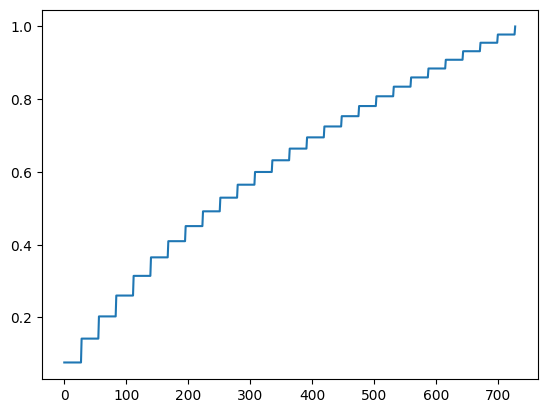

In [189]:
# plot the explained variance ratio
S = pca.S
plt.plot(S.cumsum() / S.sum())

# report the truncated feature ratio
explained_var_ratio = (S.cumsum() / S.sum())[pca.n_components]
print(f'Explained variance ratio with {pca.n_components} components: {explained_var_ratio:.4f}')

In [175]:
print(X_train.shape)

(21000, 784)


In [191]:
X_train_subset = pca.predict(X_train)
X_test_subset = pca.predict(X_test)

classifier = LinearClassifier(n_features=27)
classifier.fit(X_train_subset, y_train)

(27, 784)
(27, 784)
iteration 0: loss 22.4432, accuracy 0.0780
iteration 50: loss 0.5512, accuracy 0.8659
iteration 100: loss 0.4307, accuracy 0.8780
iteration 150: loss 0.4154, accuracy 0.8804
Final iteration 199: loss 0.4138, accuracy 0.8800


**Evaluate our test accuracy with PCA.** You are expected to achieve a higher accuracy ~80%.

In [192]:
preds = classifier.predict(X_test_subset)
test_acc = (preds == y_test).mean()
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.8789


### PCA for visualization
The following block of code will visualize the first 2 principal components. You should discuss what you see by comparing the clusters of different digits in the 2D space.

(27, 784)


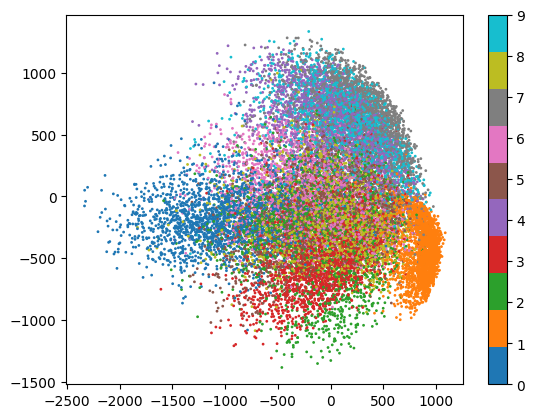

In [193]:
# extract the first two PCs from the training set and plot it
X_train_subset = pca.predict(X_train)
X_train_subset = X_train_subset[:, :2]

plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train, cmap='tab10', alpha=1.0, s=1)
plt.colorbar()

## Task 3C: Neural Network (40pt + 10 bonus pt)

Your goal in this exercise is to classify
handwritten digits with neural networks. The training and test units, together with the
structure of a multilayer perceptron class are already provided in the starter code. Your task
is to code up the key lines that complete the **forward** and **backward** propagation functions.


**forward**: Recall that forward propagation corresponds to the prediction algorithm for neural nets. The
intermediate outputs for this method will be cached for backpropagation during the training phase.

**backward**: Backpropagation collects all the gradients necessary for training the neural network, which will be
used as input for the minibatch SGD algorithm GradientDescentOptimizer

In the next, you will need to implement the forward pass and backward pass of the linear layer. For the forward pass, it takes $x_l$ as input and outputs $x_{l+1}$.

$$x_{l+1} = w^\top x_{l} + b_{l}$$

For the backward pass, you will need to compute the backward gradients,

$$ \frac{\partial \ell(x, y)}{\partial w}=?$$ 
$$\frac{\partial \ell(x, y)}{\partial b}=?$$
$$\frac{\partial \ell(x, y)}{\partial x_{l}}=?$$

where $\ell$ is the loss function. 

### Task 3C-I: Forward and Backward Propogation (20pt)

**Implement the forward and backward pass of the linear layer.**

In [223]:
import numpy as np

class Layer(object):
    def __init__(self, shape, activ_func):
        "Implements a layer of a NN."
      
        self.w = np.random.uniform(-np.sqrt(2.0 / shape[0]),
                                   np.sqrt(2.0 / shape[0]),
                                   size=shape)
        self.b = np.zeros((1, shape[1]))

        # The activation function, for example, RELU, tanh, or sigmoid.
        self.activate = activ_func

        # The derivative of the activation function.
        self.d_activate = GRAD_DICT[activ_func]

    def forward(self, inputs):
        """Forward propagate the activation through the layer.
        
        Given the inputs (activation of previous layers),
        compute and save the activation of current layer,
        then return it as output.
        """

        ###################################Description begins#################
        # Forward pass

        # Use the linear and non-linear transformation to
        # compute the activation and cache it in a the field, self.a.

        # Functions you may use:
        # np.dot: numpy function to compute dot product of two matrix.
        # self.activate: the activation function of this layer,
        #                it takes in a matrix of scores (linear transformation)
        #                and compute the activations (non-linear transformation).
        # (plus the common arithmetic functions).

        # For all the numpy functions, use google and numpy manual for
        # more details and examples.        
        
        # Object fields you will use:
        # self.w:
        #     weight matrix, a matrix with shape (H_-1, H).
        #     H_-1 is the number of hidden units in previous layer
        #     H is the number of hidden units in this layer
        # self.b: bias, a matrix/vector with shape (1, H).
        # self.activate: the activation function of this layer.

        # Input:
        # inputs:
        #    a matrix with shape (N, H_-1),
        #    N is the number of data points.
        #    H_-1 is the number of hidden units in previous layer

        ###################################Description ends####################
        # Modify the right hand side of the following code.
        
        # The linear transformation.
        # scores:
        #     weighted sum of inputs plus bias, a matrix of shape (N, H).
        #     N is the number of data points.
        #     H is the number of hidden units in this layer.

        scores = inputs@self.w + self.b ## Your code here ##
        # End of your code
         

        # The non-linear transformation.
        # outputs:
        #     activations of this layer, a matrix of shape (N, H).
        #     N is the number of data points.
        #     H is the number of hidden units in this layer.

        activations = self.activate(scores) ## Your code here ##
        # End of your code

        # End of the code to modify
        #########################################################

        # Cache the inputs and the activations (to be used by backprop).
        
        self.inputs = inputs
        self.a = activations
        outputs = activations
        return outputs

    def backward(self, d_outputs):
        """Backward propagate the gradient through this layer.
        
        Given the gradient w.r.t the output of this layer
        (d_outputs), compute and save the gradient w.r.t the
        weights (d_w) and bias (d_b) of this layer and
        return the gradient w.r.t the inputs (d_inputs).
        """
        ###################################Description begins#################
        # Backpropagation

        # Compute the derivatives of the loss w.r.t the weights and bias
        # given the derivatives of the loss w.r.t the outputs of this layer
        # using chain rule.

        # Naming convention: use d_var to store the
        # derivative of the loss w.r.t the variable.
        
        # Functions you may use:
        # np.dot (numpy.dot): numpy function to compute dot product of two matrix.
        # np.mean or np.sum (numpy.mean or numpy.sum):
        #     numpy function to compute the mean or sum of a matrix,
        #     use keywords argument 'axis' to compute the mean
        #     or sum along a particular axis, you might also
        #     found 'keepdims' argument useful.
        # self.d_activate:
        #     given the current activation (self.a) as input,
        #     compute the derivative of the activation function,
        #     See d_relu as an example.
        # (plus the common arithmetic functions).
        # np.transpose or m.T (m is an numpy array): transpose a matrix.
        
        
        # Object fields you will use:
        # self.w: weight matrix, a matrix with shape (H_-1, H).
        #         H_-1 is the number of hidden units in previous layer
        #         H is the number of hidden units in this layer
        # self.d_activate: compute derivative of the activation function.
        #                  See d_relu as an example.
        # d_outputs: the derivative of the loss w.r.t the outputs of
        #            this layer, a matrix of shape (N, H). N is the number of
        #            data points and H is the number of hidden units in this layer.
        # self.inputs: inputs to this layer, a matrix with shape (N, H_-1)
        #              N is the number of data points.
        #              H_-1 is the number of hidden units in previous layer.
        # self.a: activation of the hidden units of this layer, a matrix
        #         with shape (N, H)
        #         N is the number of data points.
        #         H is the number of hidden units in this layer.

        ###################################Description ends####################
        
        
        # Modify the right hand side of the following code.

        # d_scores:
        #     Derivatives of the loss w.r.t the scores (the result from linear transformation).
        #     A matrix of shape (N, H)
        #     N is the number of data points.
        #     H is the number of hidden units in this layer.
        d_scores = self.d_activate(self.a) * d_outputs ## Your code here ##
        # End of your code

        # self.d_b:
        #     Derivatives of the loss w.r.t the bias, averaged over all data points.
        #     A matrix of shape (1, H)
        #     H is the number of hidden units in this layer.

        self.d_b = np.mean(d_scores,axis=0,keepdims=True) ## Your code here ##
        # End of your code

        # self.d_w:
        #     Derivatives of the loss w.r.t the weight matrix, averaged over all data points.
        #     A matrix of shape (H_-1, H)
        #     H_-1 is the number of hidden units in previous layer
        #     H is the number of hidden units in this layer.  
        ## Your code here ##    
        n,m = self.inputs.shape
        self.d_w = self.inputs.T@d_scores
        # End of your code

        # d_inputs:
        #     Derivatives of the loss w.r.t the previous layer's activations/outputs.
        #     A matrix of shape (N, H_-1)
        #     N is the number of data points.
        #     H_-1 is the number of hidden units in the previous layer.
        ## Your code here ##
        d_inputs = d_scores@self.w.T 
        # End of your code

        # End of the code to modify
        #########################################################
        
		# Compute the average value of the gradients, since
        # we are minimizing the average loss. 
        self.d_b /= d_scores.shape[0]
        self.d_w /= d_scores.shape[0]
        
        return d_inputs

You have successfully completed task 3C-I. Please run the code to define the Multi-Layer Perceptron (MLP).

In [224]:
import numpy as np
    
#########################
#  Multilayer Perceptron
#########################

class MLP(object):
    def __init__(self, input_dim, output_dim, sizes, activ_funcs):
        """Multilayer perceptron for multi-class classification.

        The object holds a list of layer objects, each one
        implements a layer in the network, the specification
        of each layer is decided by input_dim, output_dim,
        sizes and activ_funcs. Note that an output layer
        (linear) and loss function (softmax and
        cross-entropy) would be automatically added to the MLP.

        Input: 
          input_dim: dimension of input.
          output_dim: dimension of output (number of labels).
          sizes: a list of integers specifying the number of
            hidden units on each layer.
          activ_funcs: a list of function objects specifying
            the activation function of each layer.

        """
        # Last layer is linear and loss is mean_cross_entropy_softmax
        self.sizes = [input_dim] + sizes[:] + [output_dim]
        self.activ_funcs = activ_funcs[:] + [linear]
        self.shapes = []
        for i in range(len(self.sizes)-1):
            self.shapes.append((self.sizes[i], self.sizes[i+1]))

        self.layers = []
        for i, shape in enumerate(self.shapes):
            self.layers.append(Layer(shape, self.activ_funcs[i]))

    def forwardprop(self, data, labels=None):
        """Forward propagate the activations through the network.

        Iteratively propagate the activations (starting from
        input data) through each layer, and output a
        probability distribution among labels (probs), and
        if labels are given, also compute the loss. 
        """
        inputs = data
        for layer in self.layers:
            outputs = layer.forward(inputs)
            inputs = outputs
            
        probs = softmax(outputs)
        if labels is not None:
            return probs, self.loss(outputs, labels)
        else:
            return probs, None

    def backprop(self, labels):
        """Backward propagate the gradients/derivatives through the network.
        
        Iteratively propagate the gradients/derivatives (starting from
        outputs) through each layer, and save gradients/derivatives of
        each parameter (weights or bias) in the layer.
        """
        d_outputs = self.d_loss(self.layers[-1].a, labels)
        for layer in self.layers[::-1]:
            d_inputs = layer.backward(d_outputs)
            d_outputs = d_inputs

    def loss(self, outputs, labels):
        "Compute the cross entropy softmax loss."
        return mean_cross_entropy_softmax(outputs, labels)

    def d_loss(self, outputs, labels):
        "Compute derivatives of the cross entropy softmax loss w.r.t the outputs."
        return d_mean_cross_entropy_softmax(outputs, labels)
        
    def predict(self, data):
        "Predict the labels of the data."
        probs, _ = self.forwardprop(data)
        return np.argmax(probs, axis=1)


class GradientDescentOptimizer(object):
    def __init__(self, learning_rate, decay_steps=1000,
                 decay_rate=1.0):
        "Gradient descent with staircase exponential decay."
        self.learning_rate = learning_rate
        self.steps = 0.0
        self.decay_steps = decay_steps
        self.decay_rate = decay_rate
        
    def update(self, model):
        "Update model parameters."
        for layer in model.layers:
            layer.w -= layer.d_w * self.learning_rate
            layer.b -= layer.d_b * self.learning_rate
        self.steps += 1
        if (self.steps + 1) % self.decay_steps == 0:
            self.learning_rate *= self.decay_rate


# Utility functions.
def sigmoid(x): 
    return 1/(1+np.exp(-x))   

def d_sigmoid(a=None, x=None):
    if a is not None:
        return a * (1 - a)
    else:
        return d_sigmoid(a=sigmoid(x))

def relu(x):
    "The rectified linear activation function."
    return np.clip(x, 0.0, None)

def d_relu(a=None, x=None):
    "Compute the derivative of RELU given activation (a) or input (x)."
    if a is not None:    
        d = np.zeros_like(a)
        d[np.where(a > 0.0)] = 1.0
        return d
    else:
        return d_relu(a=relu(x))

def tanh(x):
    "The tanh activation function."
    return np.tanh(x)

def d_tanh(a=None, x=None):
    "The derivative of the tanh function."
    if a is not None:
        return 1 - a ** 2
    else:
        return d_tanh(a=tanh(x))

def linear(x):
    return x

def d_linear(a=None, x=None):
    return 1.0

def softmax(x):
    shifted_x = x - np.max(x, axis=1, keepdims=True)
    f = np.exp(shifted_x)
    p = f / np.sum(f, axis=1, keepdims=True)
    return p
    
def mean_cross_entropy(outputs, labels):
    n = labels.shape[0]
    return - np.sum(labels * np.log(outputs)) / n

def mean_cross_entropy_softmax(logits, labels):
    return mean_cross_entropy(softmax(logits), labels)

def d_mean_cross_entropy_softmax(logits, labels):
    return softmax(logits) - labels


# Mapping from activation functions to its derivatives.
GRAD_DICT = {linear: d_linear, sigmoid: d_sigmoid, tanh: d_tanh, relu: d_relu}


Now that we have defined the MLP, let's prepare the data. 

We will still use the MNIST dataset, but we will preprocess the data differently for the neural network.

We will normalize the pixel values to be between 0 and 1 and use one-hot encoding for the labels.

In [212]:
# Download dataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

print('Loading and preprocessing data')
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, data_home='data')
X = X / 255.0
y = y.astype(int)

(train_data, test_data, train_labels, test_labels) = train_test_split(X, y, random_state=0, test_size=0.7)

def create_one_hot_labels(labels, dim=10):
    one_hot_labels = np.zeros((labels.shape[0], dim))
    for i in range(labels.shape[0]):
        one_hot_labels[i][labels[i]] = 1
    return one_hot_labels

# Convert labels from integers to one-hot encodings
test_labels = create_one_hot_labels(test_labels)
train_labels = create_one_hot_labels(train_labels)

Loading and preprocessing data


### Task 3C-II Training the Neural Network (10pt)

**Report the training loss, training accuracy, test loss, and test accuracy for the default network architecture.**

    ` MLP(784, 10, [16], [sigmoid])`

In [225]:
# Initialize model
print('Initializing neural network')
model = MLP(784, 10, [16], [sigmoid])

selected = np.random.randint(test_data.shape[0], size=100)
true_labels = np.argmax(test_labels[selected], axis=1)
preds_init = model.predict(test_data[selected])

Initializing neural network


In [226]:
print('Start training')

n_train = train_data.shape[0]
n_epochs = 25
batch_size = 100
opt = GradientDescentOptimizer(0.01)

train_loss_list = []
train_accuracy_list = []
for i in range(n_epochs):
    sum_loss = 0.0
    for j in range((n_train - 1) // batch_size + 1):
        batch_data = train_data[j*batch_size:(j+1)*batch_size]
        batch_labels = train_labels[j*batch_size:(j+1)*batch_size]
        _, loss = model.forwardprop(batch_data, batch_labels)
        if np.isnan(loss):
            print('batch %s loss is abnormal')
            print(loss)
            continue
        sum_loss += loss
        model.backprop(batch_labels)
        opt.update(model)
    train_loss = sum_loss/(j+1)
    train_accuracy = (np.sum(model.predict(train_data) == 
                              np.argmax(train_labels, axis=1)) / 
                      np.float64(train_labels.shape[0]))
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)
    print('=' * 20 + ('Epoch %d' % i) + '=' * 20)
    print('Train loss %s accuracy %s' % (train_loss, train_accuracy))

# Compute test loss and accuracy.
_, test_loss = model.forwardprop(test_data, test_labels)
test_accuracy = (np.sum(model.predict(test_data) == 
                        np.argmax(test_labels, axis=1)) / 
                  np.float64(test_labels.shape[0]))
print('=' * 20 + 'Training finished' + '=' * 20 + '\n')
print ('Test loss %s accuracy %s\n' %
        (test_loss, test_accuracy))

preds_trained = model.predict(test_data[selected])

Start training
====================Epoch 0====================
Train loss 2.305294148347072 accuracy 0.31057142857142855
====================Epoch 1====================
Train loss 2.176140657624398 accuracy 0.42814285714285716
====================Epoch 2====================
Train loss 2.0804822363677005 accuracy 0.47276190476190477
====================Epoch 3====================
Train loss 1.9819327873472137 accuracy 0.5167142857142857
====================Epoch 4====================
Train loss 1.879475490884267 accuracy 0.5584285714285714
====================Epoch 5====================
Train loss 1.776992011854562 accuracy 0.597
====================Epoch 6====================
Train loss 1.678003218886782 accuracy 0.6288571428571429
====================Epoch 7====================
Train loss 1.5847218431448962 accuracy 0.6577619047619048
====================Epoch 8====================
Train loss 1.4981911185227186 accuracy 0.6804285714285714
====================Epoch 9===================

Plot the training loss and accuracy as a function of the number of epochs for debugging.

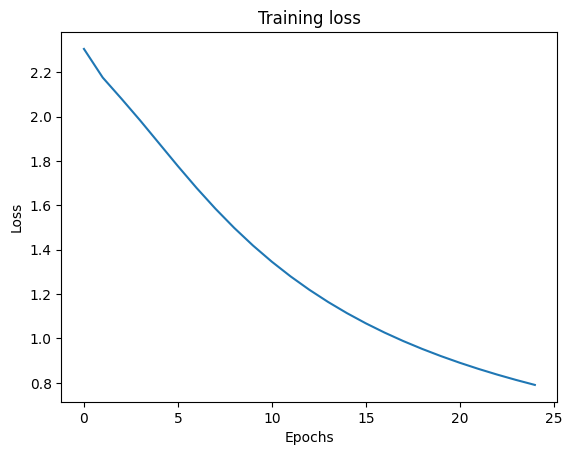

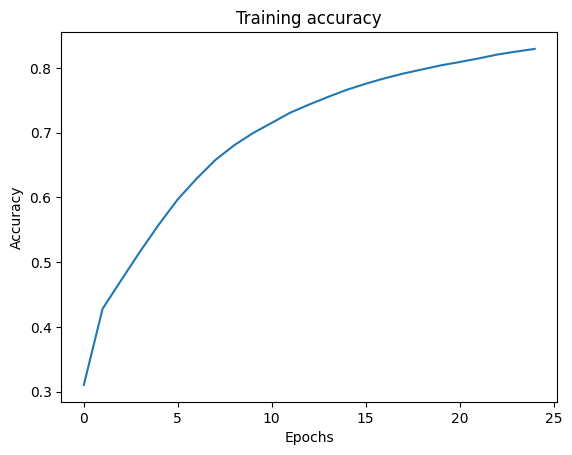

In [227]:
import matplotlib.pyplot as plt

# Plot the training loss and accuracy separately.
plt.plot(range(n_epochs), train_loss_list, label='train loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training loss')
plt.show()

plt.plot(range(n_epochs), train_accuracy_list, label='train accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy')
plt.show()

### Task 3C-III Visualizing the Predictions (5pt)

In your solution, **include a plot of the test samples using the following code.**

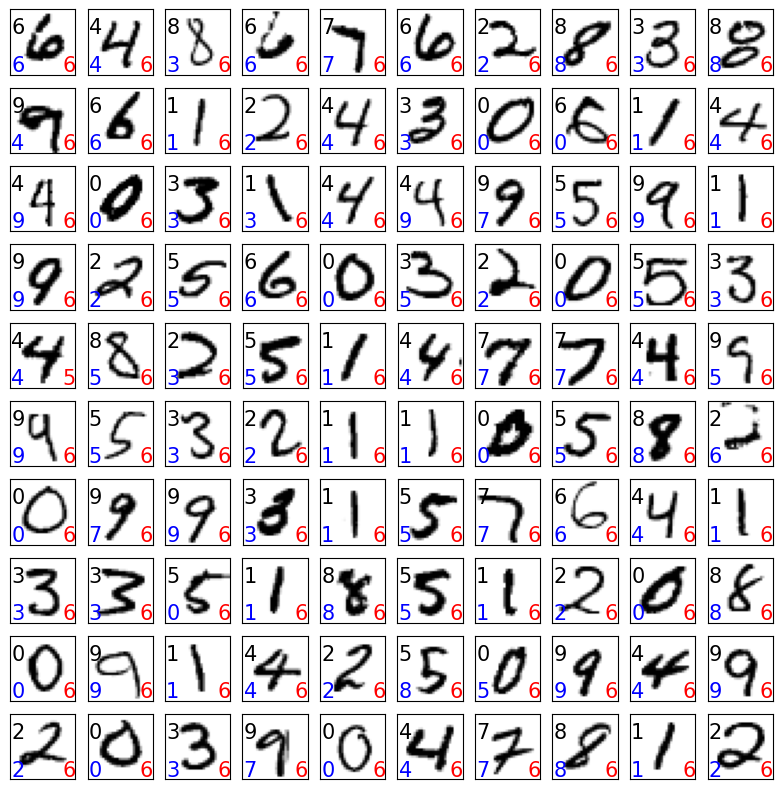

In [228]:
import matplotlib.pyplot as plt

# plot sample test images together with their groundtruth 
# and predicted labels before and after training

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(wspace=0)
for a, image, true_label, pred_init, pred_trained in zip(
        axes.flatten(), test_data[selected],
        true_labels, preds_init, preds_trained):
    a.imshow(image.reshape(28, 28), cmap='gray_r')
    a.text(0, 10, str(true_label), color="black", size=15)
    a.text(0, 26, str(pred_trained), color="blue", size=15)
    a.text(22, 26, str(pred_init), color="red", size=15)

    a.set_xticks(())
    a.set_yticks(())

plt.show()

### Task 3C-IV Visualizing the Weights (5pt)

Please include a **visualization of the weights of the first layer in the MLP**, along with a **detailed explanation of the code** and **a brief summary of any observed patterns and understandings**.

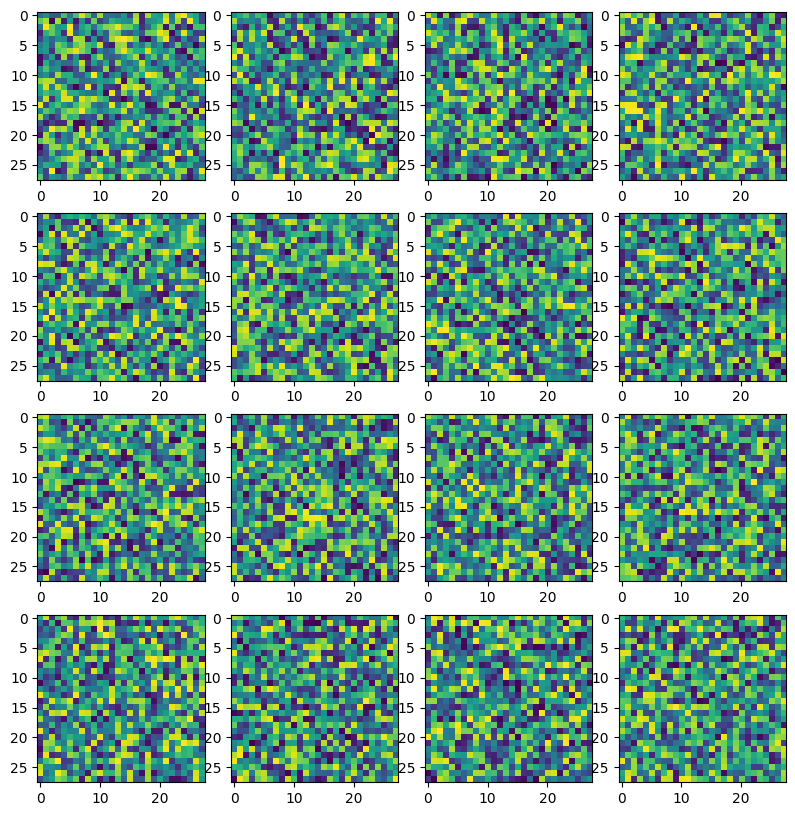

In [221]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.subplots_adjust(wspace=0)
idx = 0
for a in axes.flatten():
    a.imshow(model.layers[0].w[:, idx].reshape((28, 28)))
    idx +=1
plt.show()

### (Bonus 10pt) Task 3C-V: Hyperparameter tuning

Modify only the network architecture (e.g. number of hidden units, activation functions, etc.) to improve the test accuracy, and provide a summary of your findings.

In [262]:
# Initialize model
print('Initializing neural network')

## Your code here ##


# model = MLP(784, 10, [16], [sigmoid]) #-> 82% accuracy 
# model = MLP(784, 10, [50], [sigmoid]) #-> 86% accuracy. 
# It seems that more nodes improve accuracy
# model = MLP(784, 10, [50,50], [sigmoid,sigmoid]) #-> 50% accuracy
#The sigmoid function when taken the gradient might have overshooting issue. I try to fit relu
# model = MLP(784, 10, [16], [relu]) #-> 90% accuracy
# The accuracy improved
# model = MLP(784, 10, [50], [relu]) #-> 90% accuracy
#increasing nodes but not the layers did not improve accuracy as oppose to just using the relu function 
# model = MLP(784, 10, [16,16], [relu,relu]) #-> 91% accuracy
#increase more nodes and more layers
model = MLP(784, 10, [150,150,150,150,150], [relu,relu,relu,relu,relu]) #-> 93% accuracy

#conclusion: 
#it seems that with the sigmoid function, with more layers and nodes it can lead to gradient descent overshooting
#and we lose accuracy. Because of this, we don't use the sigmoid activation function. However, when we use the relu, 
# becasue of its shape, it does not over shoot. Now, we can add more layers and more nodes to increase accuracy. With 4
#layerse and 150 nodes, I get around 93 accuracy. This is alot higher than our oringial model







################# Do not modify the following code ############
selected = np.random.randint(test_data.shape[0], size=100)
true_labels = np.argmax(test_labels[selected], axis=1)
preds_init = model.predict(test_data[selected])

print('Start training')

n_train = train_data.shape[0]
n_epochs = 25
batch_size = 100
opt = GradientDescentOptimizer(0.01)

for i in range(n_epochs):
    sum_loss = 0.0
    for j in range((n_train - 1) // batch_size + 1):
        batch_data = train_data[j*batch_size:(j+1)*batch_size]
        batch_labels = train_labels[j*batch_size:(j+1)*batch_size]
        _, loss = model.forwardprop(batch_data, batch_labels)
        if np.isnan(loss):
            print('batch %s loss is abnormal')
            print(loss)
            continue
        sum_loss += loss
        model.backprop(batch_labels)
        opt.update(model)
    train_loss = sum_loss/(j+1)
    train_accuracy = (np.sum(model.predict(train_data) == 
                              np.argmax(train_labels, axis=1)) / 
                      np.float64(train_labels.shape[0]))
    
    print('=' * 20 + ('Epoch %d' % i) + '=' * 20)
    print('Train loss %s accuracy %s' % (train_loss, train_accuracy))

# Compute test loss and accuracy.
_, test_loss = model.forwardprop(test_data, test_labels)
test_accuracy = (np.sum(model.predict(test_data) == 
                        np.argmax(test_labels, axis=1)) / 
                  np.float64(test_labels.shape[0]))
print('=' * 20 + 'Training finished' + '=' * 20 + '\n')
print ('Test loss %s accuracy %s\n' %
        (test_loss, test_accuracy))

preds_trained = model.predict(test_data[selected])

Initializing neural network
Start training
====================Epoch 0====================
Train loss 2.2990822547626757 accuracy 0.22933333333333333
====================Epoch 1====================
Train loss 2.2870896260201814 accuracy 0.2893809523809524
====================Epoch 2====================
Train loss 2.2553076144657465 accuracy 0.2948095238095238
====================Epoch 3====================
Train loss 2.109961704650178 accuracy 0.31795238095238093
====================Epoch 4====================
Train loss 1.6188950198487377 accuracy 0.681047619047619
====================Epoch 5====================
Train loss 0.958926850128749 accuracy 0.7925714285714286
====================Epoch 6====================
Train loss 0.6249998942639055 accuracy 0.8348571428571429
====================Epoch 7====================
Train loss 0.5206383644820247 accuracy 0.8580476190476191
====================Epoch 8====================
Train loss 0.4665418125222671 accuracy 0.8729523809523809
====